# Avaliação - Estatística (Turma 735)
---

# Importação das bibliotecas

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import normaltest
from scipy.stats import norm
from scipy.stats import t as t_student

sns.set()

## Questão 01

Carregue os dados do dataset [`car_details`](https://s3-sa-east-1.amazonaws.com/lcpi/4fbc4943-7af3-4c42-9a21-4d9eb121a28d.csv) e, em seguida:

a. Classifique as variáveis do dataset como quantitativas (contínua/discreta) ou qualitativas (ordinal/nominal);  
b. Obtenha a média, a mediana e a moda das variáveis quantitativas e, em seguida, classifique cada uma dessas variáveis quanto à sua simetria.  
c. Calcule os percentis do preço de venda dos carros. Em seguida, indique o percentual dos carros que podem ser adquiridos por um preço de até R\\$ 120.000,00.  

### Dataframe

In [2]:
df = pd.read_csv('https://s3-sa-east-1.amazonaws.com/lcpi/4fbc4943-7af3-4c42-9a21-4d9eb121a28d.csv')

df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
df.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [6]:
df.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

### Classificação das variáveis

In [7]:
nominal_qualitative = ['name', 'fuel', 'seller_type', 'transmission']
ordinal_qualitative = ['owner']
continuous_quantitative = ['selling_price', 'km_driven']
discrete_quantitative = ['year']

print(f'Variáveis qualitativas nominais: {nominal_qualitative}')
print(f'Variáveis qualitativas ordinais: {ordinal_qualitative}')
print(f'Variáveis quantitativas contínuas: {continuous_quantitative}')
print(f'Variáveis quantitativas discretas: {discrete_quantitative}')

Variáveis qualitativas nominais: ['name', 'fuel', 'seller_type', 'transmission']
Variáveis qualitativas ordinais: ['owner']
Variáveis quantitativas contínuas: ['selling_price', 'km_driven']
Variáveis quantitativas discretas: ['year']


### Simetria das variáveis quantitativas

In [8]:
quantitatives = []
quantitatives.extend(continuous_quantitative)
quantitatives.extend(discrete_quantitative)

for variable in quantitatives:
    average = df[variable].mean() 
    median = df[variable].median()
    mode = df[variable].mode()
    
    if average == median and median == float(mode.to_string(index = False)):
        classification = 'Simétrica'
    elif float(mode.to_string(index = False)) < median and median < average:
        classification = 'Assimétrica à Direita'
    else:
        classification = 'Assimétrica à Esquerda'
    
    print(f'Variável: {variable}')
    print(f'Média: {average}')
    print(f'Mediana: {median}')
    print(f'Moda: {mode.to_string(index = False)}')
    print(f'Classificação: {classification}')
    print()

Variável: selling_price
Média: 504127.3117511521
Mediana: 350000.0
Moda: 300000
Classificação: Assimétrica à Direita

Variável: km_driven
Média: 66215.77741935484
Mediana: 60000.0
Moda: 70000
Classificação: Assimétrica à Esquerda

Variável: year
Média: 2013.0907834101383
Mediana: 2014.0
Moda: 2017
Classificação: Assimétrica à Esquerda



### Percentis do preço de venda dos carros
Calcule os percentis do preço de venda dos carros. Em seguida, indique o percentual dos carros que podem ser adquiridos por um preço de até R$ 120.000,00.

In [9]:
quartis = df.selling_price.quantile([0.25, 0.5, 0.75])

quartis = quartis.reset_index()

for row in quartis.itertuples():
    print(f'{row.index * 100}%: ${row.selling_price:.2f}')
    
quartis_percentil = df.selling_price.quantile([i/100 for i in range(1, 100)]).head(12)

quartis_percentil = quartis_percentil.reset_index()

percentil = quartis_percentil.loc[quartis_percentil['selling_price'] == 120000]['index']

print(f'Até {float(percentil) * 100}% dos carros podem ser adiquiridos com R$ 120.000,00')

25.0%: $208749.75
50.0%: $350000.00
75.0%: $600000.00
Até 11.0% dos carros podem ser adiquiridos com R$ 120.000,00


## Questão 02

De 50.000 válvulas fabricadas por uma companhia retira-se uma amostra de 400 válvulas, e obtém a vida média de 800 horas e o desvio padrão de 100 horas.

a. Qual o intervalo de conﬁança de 99% para a vida média da população?  
b. Que tamanho deve ter a amostra para que o erro máximo seja de 7,84 horas, com uma confiança de 95%?  

### Intervalo de confiança

In [70]:
sample_mean = 800
sigma = 100
n = 400
confidence = 0.99
meaningfulness = 1 - confidence

In [11]:
z_alpha_2 = norm.ppf(confidence + meaningfulness / 2)
z_alpha_2

2.5758293035489004

In [12]:
error = z_alpha_2 * sigma / np.sqrt(n)
error

12.879146517744502

In [13]:
print('Intervalo de confiança da média:', (sample_mean - error, sample_mean + error))

Intervalo de confiança da média: (787.1208534822555, 812.8791465177445)


### Tamanho da amostra

In [73]:
sigma = 100
max_erro = 7.84
confidence = 0.95
meaningfulness = 1 - confidence
z_alpha_2 = norm.ppf(confidence + meaningfulness / 2)

n = (z_alpha_2 * sigma / max_erro)**2

n = int(np.ceil(n))

print(f'Tamanho da amostra: {n}')

Tamanho da amostra: 625


## Questão 03

Na indústria cerâmica, avalia-se sistematicamente a resistência de amostras de massas cerâmicas, após o processo de queima. Dessas avaliações, sabe-se que certo tipo de massa tem resistência mecânica aproximadamente normal, com **média populacional de 53 MPa** e **variância populacional de 16 MPa²**. Após a troca de alguns fornecedores de matérias-primas, deseja-se **verificar se houve alteração na qualidade** (se a média deixou de ser 53 MPa). Uma **amostra de 15** corpos de prova de massa cerâmica acusou **média igual a 50 MPa**. Qual é a conclusão ao nível de significância de 5%?

In [15]:
sample_mean = 53
variance = 16
sigma = np.sqrt(variance)
n = 15
meaningfulness = 0.05
confidence = 1 - meaningfulness
u0 = 50

In [16]:
z_alpha_2 = norm.ppf(confidence + (meaningfulness / 2))
z_alpha_2

1.959963984540054

In [17]:
z = (sample_mean - u0) / (sigma / np.sqrt(n))
z

2.904737509655563

In [18]:
if z <= -z_alpha_2 or z >= z_alpha_2:
    print('Rejeita H0')
else:
    print('Aceita H0')

Rejeita H0


## Questão 04

Você é um pesquisador que estuda o mercado de trabalho brasileiro e resolve estudar as diferenças salariais dos trabalhadores dos estados do Rio de Janeiro e de São Paulo. Durante sua pesquisa você verifica que, aparentemente, os rendimentos dos trabalhadores no estado do Rio de Janeiro são mais baixos que os rendimentos dos trabalhadores no estado de São Paulo. Para confirmar esta conclusão realize um teste de hipótese de comparação de médias em cima de duas amostras de trabalhadores dos dois estados. Siga as seguintes etapas:

- Selecione duas amostras de **500 trabalhadores** para cada um dos dois estados (variável UF) para realizar o teste. Utilize o **parâmetro random_state=101**.
- Considere o **nível de significância de 5%**.
- Teste a hipótese de que a **renda média dos trabalhadores do Rio de Janeiro é menor que a renda média dos trabalhadores de São Paulo**.

> [Link para o dataset](https://s3-sa-east-1.amazonaws.com/lcpi/360d2eaa-970a-4204-8004-53bb42af101a.csv).

> **OBS.:** Os dados da dataset referentes à UF foram convertidos (de categóricos para numéricos), portanto, utilize a tabela abaixo para identificar SP e RJ:

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

In [19]:
df = pd.read_csv('https://s3-sa-east-1.amazonaws.com/lcpi/360d2eaa-970a-4204-8004-53bb42af101a.csv')

df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [20]:
income_rj = df.loc[df['UF'] == 33]['Renda']

income_rj.head()

41015     788
41016    3000
41017    2000
41018    2100
41019    1800
Name: Renda, dtype: int64

In [21]:
income_sp = df.loc[df['UF'] == 35]['Renda']

income_sp.head()

46571    6000
46572    1500
46573    3000
46574    2300
46575    1500
Name: Renda, dtype: int64

In [22]:
sample_rj = income_rj.sample(n = 500, random_state = 101)

sample_rj

45760     1300
42265    35000
41069     1300
44659     2364
46366     1500
         ...  
41430        0
41175     1200
46168     1800
42005     2500
45970     5000
Name: Renda, Length: 500, dtype: int64

In [23]:
sample_sp = income_sp.sample(n = 500, random_state = 101)

sample_sp

49905    1800
47376     700
50288    8000
54266    1800
54578    2364
         ... 
48673    1090
47090    1530
49367    1500
47178    1200
50778     900
Name: Renda, Length: 500, dtype: int64

In [86]:
n = 500
meaningfulness = 0.05
confidence = 1 - meaningfulness
mean_rj = sample_rj.mean()
sigma_rj = sample_rj.std()
mean_sp = sample_sp.mean()
sigma_sp = sample_sp.std()
gl = 500 + 500 - 2
D_0 = 0

In [87]:
t_alpha = t_student.ppf(confidence, gl)

t_alpha

1.6463818766348755

In [83]:
numerator = (mean_rj - mean_sp) - D_0

denominator = np.sqrt((sigma_rj ** 2 / 500) + (sigma_sp ** 2 / 500))

t = numerator / denominator

t

-2.255318273608561

In [84]:
if (t >= t_alpha):
    print('Rejeitar H0')
else:
    print('Aceitar H0')

Aceitar H0


## Questão 05

Utilize o dataset [`house-prices-clean.csv`](https://s3-sa-east-1.amazonaws.com/lcpi/a6c106c4-87a1-4953-980b-106889749acd.csv) para criar um modelo de regressão linear capaz de estimar o preço de venda (coluna `'SalePrice'`) das casas.

O que é esperado de você nessa questão:

1. Crie um modelo considerando apenas as variáveis númericas, por exemplo;
2. Remova os outliers e vefique como fica o modelo;
3. Você pode eliminar variáveis desnecessárias.

> Lembrando que para cada um dos itens acima, é importante que você avalie o modelo em termos do $R^2$ e dos resíduos. Escrever os motivos de algumas das suas decisões e comentar suas respostas poderão me ajudar a entender melhor no momento da correção.

### Dataframe

In [25]:
df = pd.read_csv('https://s3-sa-east-1.amazonaws.com/lcpi/a6c106c4-87a1-4953-980b-106889749acd.csv')

In [26]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [27]:
df = df.drop('Id', axis=1)

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [28]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [30]:
df.shape

(1460, 75)

In [31]:
df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,0.043340,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,-0.072302,...,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
BsmtFinSF1,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.043340,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072302,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


### Modelo inicial apenas com variáveis numéricas

In [32]:
columns = df.corr().columns

df_numerical = df[[column for column in columns]]

In [33]:
X = df_numerical[[column for column in columns if column != 'SalePrice']]

y = df_numerical.SalePrice

#### LinearRegression

In [34]:
lr = LinearRegression().fit(X, y)

y_pred_initial = lr.predict(X)

lr.score(X, y)

0.8131246345519311

In [35]:
residuos = y - y_pred_initial

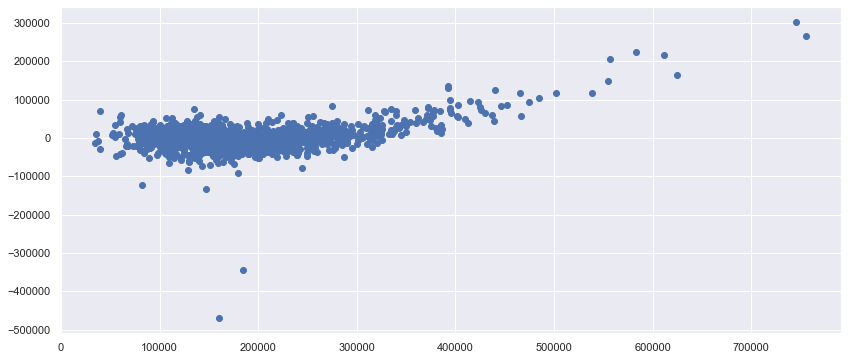

In [36]:
plt.figure(figsize=(14, 6))

plt.scatter(y, residuos)

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

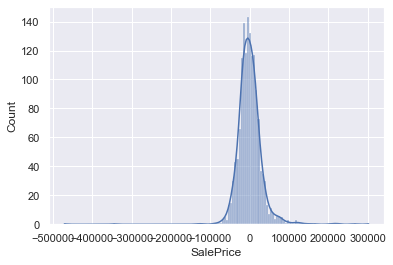

In [37]:
sns.histplot(residuos, kde=True)

#### Statsmodels

In [38]:
x = sm.add_constant(X)

model_initial = sm.OLS(y, x).fit()

C:\Users\lucas\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [39]:
model_initial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     182.4
Date:                Fri, 17 Dec 2021   Prob (F-statistic):               0.00
Time:                        21:34:24   Log-Likelihood:                -17320.
No. Observations:                1460   AIC:                         3.471e+04
Df Residuals:                    1425   BIC:                         3.489e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           4.66e+05   1.41e+06      0.330      0.742   -2.31e+06    3.24e+06
MSSubClass     -181.5944     27.674     -6.562      0.000    -235.882    -127.307
LotFrontage     -56.2299     51.778     -1.086      0.278    -157.800      45.340
LotArea           0.4300      0.102      4.211      0.000       0.230       0.630
OverallQual    1.732e+04   1187.684     14.586      0.000     1.5e+04    1.97e+04
OverallCond    4664.8750   1032.444      4.518      0.000    2639.603    6690.147
YearBuilt       271.6504     67.550      4.021      0.000     139.142     404.159
YearRemodAdd    136.0780     68.587      1.984      0.047       1.536     270.620
MasVnrArea       31.4639      5.950      5.288      0.000      19.793      43.135
BsmtFinSF1       10.0009      2.531      3.952      0.000       5.036      14.965
BsmtFinSF2       -0.9149      4.508     -0.203      0.839      -9.757       7.927
BsmtUnfSF         0.1132      2.410      0.047      0.963      -4.615       4.841
TotalBsmtSF       9.1992      3.366      2.733      0.006       2.596      15.802
1stFlrSF         18.0583      6.187      2.919      0.004       5.923      30.194
2ndFlrSF         18.1016      5.725      3.162      0.002       6.871      29.332
LowQualFinSF     -5.2682     14.955     -0.352      0.725     -34.605      24.068
GrLivArea        30.8917      5.704      5.416      0.000      19.703      42.081
BsmtFullBath   9359.1295   2611.849      3.583      0.000    4235.647    1.45e+04
BsmtHalfBath   2037.7219   4091.533      0.498      0.619   -5988.353    1.01e+04
FullBath       3448.2688   2836.694      1.216      0.224   -2116.276    9012.814
HalfBath      -1899.5836   2663.268     -0.713      0.476   -7123.931    3324.764
BedroomAbvGr   -1.01e+04   1701.874     -5.932      0.000   -1.34e+04   -6757.549
KitchenAbvGr  -1.221e+04   5211.949     -2.343      0.019   -2.24e+04   -1985.777
TotRmsAbvGrd   5063.4133   1237.076      4.093      0.000    2636.727    7490.100
Fireplaces     3966.4304   1776.873      2.232      0.026     480.864    7451.997
GarageYrBlt     121.1547     69.582      1.741      0.082     -15.338     257.648
GarageCars     1.123e+04   2874.833      3.908      0.000    5595.282    1.69e+04
GarageArea       -4.2365      9.950     -0.426      0.670     -23.755      15.282
WoodDeckSF       24.0216      8.013      2.998      0.003       8.304      39.739
OpenPorchSF      -2.8711     15.181     -0.189      0.850     -32.651      26.909
EnclosedPorch    11.8268     16.865      0.701      0.483     -21.256      44.910
3SsnPorch        20.4962     31.394      0.653      0.514     -41.087      82.079
ScreenPorch      56.0047     17.192      3.258      0.001      22.280      89.729
PoolArea        -29.0825     23.810     -1.221      0.222     -75.788      17.623
MiscVal          -0.7302      1.855     -0.394   

#### Removendo outliers

In [40]:
columns_to_remove_outliers = []

for column in df_numerical.columns:
    var = df[column].var()
    mean = df[column].mean()
    if var > mean:
        columns_to_remove_outliers.append(column)

columns_to_remove_outliers

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice']

<AxesSubplot:xlabel='MSSubClass'>

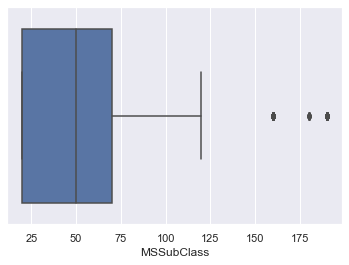

In [41]:
sns.boxplot(data=df_numerical, x='MSSubClass')

<AxesSubplot:xlabel='LotFrontage'>

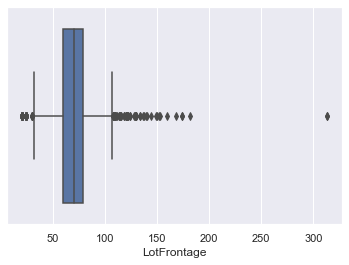

In [42]:
sns.boxplot(data=df_numerical, x='LotFrontage')

<AxesSubplot:xlabel='LotArea'>

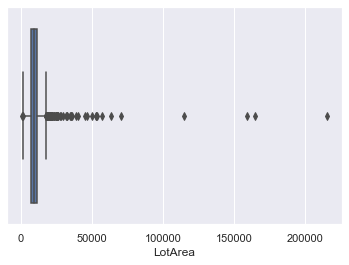

In [43]:
sns.boxplot(data=df_numerical, x='LotArea')

<AxesSubplot:xlabel='MasVnrArea'>

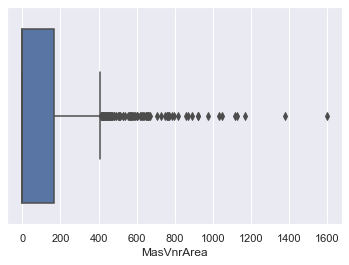

In [44]:
sns.boxplot(data=df_numerical, x='MasVnrArea')

<AxesSubplot:xlabel='ScreenPorch'>

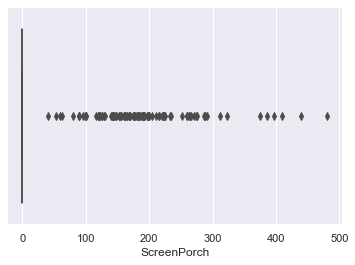

In [45]:
sns.boxplot(data=df_numerical, x='ScreenPorch')

<AxesSubplot:xlabel='EnclosedPorch'>

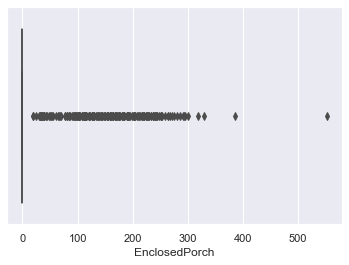

In [46]:
sns.boxplot(data=df_numerical, x='EnclosedPorch')

In [47]:
def calc_inf_sup_interval(column_data):
    Q1 = column_data.quantile(q=0.25)
    
    Q3 = column_data.quantile(q=0.75)

    IQR = Q3 - Q1

    inf = Q1 - 1.5 * IQR
    
    sup = Q3 + 1.5 * IQR

    return inf, sup

In [48]:
df_without_outliers = df_numerical.copy()

for column in columns_to_remove_outliers:
    inf, sup = calc_inf_sup_interval(df_without_outliers[column])
    
    df_without_outliers = df_without_outliers[(df_without_outliers[column] >= inf) & (df_without_outliers[column] <= sup)]

In [49]:
X = df_without_outliers[[column for column in columns if column != 'SalePrice']]

y = df_without_outliers.SalePrice

#### LinearRegression

In [50]:
lr = LinearRegression().fit(X, y)

y_pred_initial = lr.predict(X)

lr.score(X, y)

0.8934541263257375

In [51]:
residuos = y - y_pred_initial

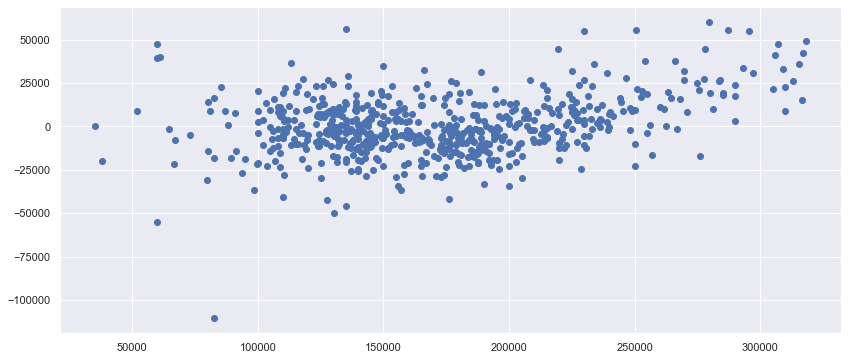

In [52]:
plt.figure(figsize=(14, 6))

plt.scatter(y, residuos)

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

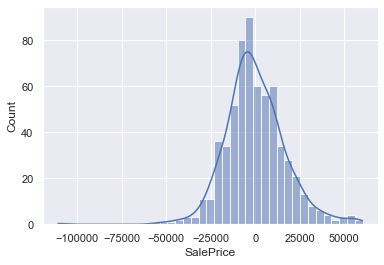

In [53]:
sns.histplot(residuos, kde=True)

#### Statsmodels

In [54]:
x = sm.add_constant(X)

model_initial = sm.OLS(y, x).fit()

C:\Users\lucas\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [55]:
model_initial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     186.0
Date:                Fri, 17 Dec 2021   Prob (F-statistic):          9.55e-271
Time:                        21:34:26   Log-Likelihood:                -6998.2
No. Observations:                 627   AIC:                         1.405e+04
Df Residuals:                     599   BIC:                         1.418e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.738e+05   1.11e+06     -0.609      0.543   -2.85e+06     1.5e+06
MSSubClass      -51.4718     30.540     -1.685      0.092    -111.450       8.506
LotFrontage     130.8700     66.571      1.966      0.050       0.129     261.610
LotArea           1.2111      0.361      3.359      0.001       0.503       1.919
OverallQual    1.059e+04   1006.409     10.520      0.000    8611.076    1.26e+04
OverallCond    5631.4120    876.893      6.422      0.000    3909.253    7353.571
YearBuilt       382.2675     68.163      5.608      0.000     248.400     516.135
YearRemodAdd    119.8640     59.345      2.020      0.044       3.315     236.413
MasVnrArea       -6.8022      7.783     -0.874      0.382     -22.087       8.483
BsmtFinSF1       20.1061      2.711      7.415      0.000      14.781      25.431
BsmtFinSF2     3.196e-10   1.02e-10      3.130      0.002    1.19e-10     5.2e-10
BsmtUnfSF         7.6420      2.417      3.162      0.002       2.896      12.388
TotalBsmtSF      27.7482      4.389      6.323      0.000      19.129      36.367
1stFlrSF          5.6151      4.383      1.281      0.201      -2.992      14.222
2ndFlrSF         29.9268      2.962     10.104      0.000      24.110      35.744
LowQualFinSF   1.886e-11   9.63e-12      1.959      0.051   -5.06e-14    3.78e-11
GrLivArea        35.5418      3.528     10.075      0.000      28.613      42.470
BsmtFullBath   4813.3346   2015.107      2.389      0.017     855.801    8770.869
BsmtHalfBath  -3489.3507   3170.523     -1.101      0.272   -9716.044    2737.342
FullBath      -1360.8481   2390.795     -0.569      0.569   -6056.207    3334.511
HalfBath      -6742.8845   2296.838     -2.936      0.003   -1.13e+04   -2232.050
BedroomAbvGr  -6572.6193   1447.417     -4.541      0.000   -9415.247   -3729.991
KitchenAbvGr  -2.423e+04   4776.937     -5.072      0.000   -3.36e+04   -1.48e+04
TotRmsAbvGrd    931.0629   1108.158      0.840      0.401   -1245.285    3107.410
Fireplaces     3447.7145   1475.119      2.337      0.020     550.681    6344.748
GarageYrBlt     181.7569     68.595      2.650      0.008      47.040     316.474
GarageCars     1254.9377   2344.825      0.535      0.593   -3350.140    5860.015
GarageArea       20.5515      8.461      2.429      0.015       3.935      37.168
WoodDeckSF        9.9120      7.922      1.251      0.211      -5.646      25.470
OpenPorchSF      16.9387     18.519      0.915      0.361     -19.431      53.308
EnclosedPorch          0          0        nan        nan           0           0
3SsnPorch              0          0        nan        nan           0           0
ScreenPorch            0          0        nan        nan           0           0
PoolArea               0          0        nan        nan           0           0
MiscVal                0          0        nan   

#### Removendo variáveis que ficaram sem dados depois de remover os outliers

In [57]:
df_without_outliers_and_unnecessary_variables = df_without_outliers.drop(['EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1)

df_without_outliers_and_unnecessary_variables.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,8,0,2003.0,2,548,0,61,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,6,1,1976.0,2,460,298,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,6,1,2001.0,2,608,0,42,9,2008,223500
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,9,1,2000.0,3,836,192,84,12,2008,250000
6,20,75.0,10084,8,5,2004,2005,186.0,1369,0,...,7,1,2004.0,2,636,255,57,8,2007,307000


In [59]:
X = df_without_outliers_and_unnecessary_variables[[column for column in df_without_outliers_and_unnecessary_variables.columns if column != 'SalePrice']]

y = df_without_outliers_and_unnecessary_variables.SalePrice

#### LinearRegression

In [60]:
lr = LinearRegression().fit(X, y)

y_pred_initial = lr.predict(X)

lr.score(X, y)

0.8934541263257371

In [61]:
residuos = y - y_pred_initial

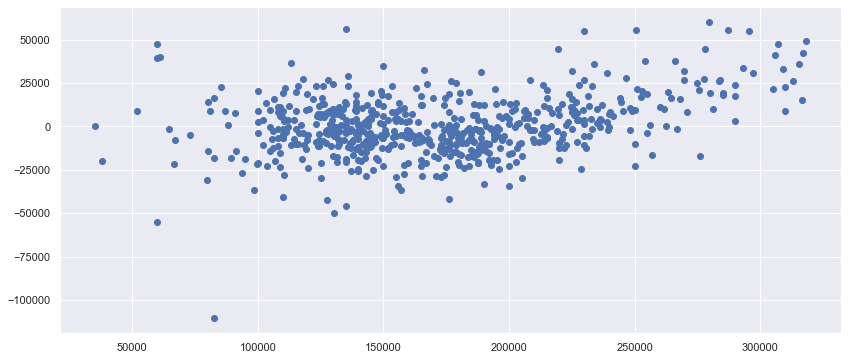

In [62]:
plt.figure(figsize=(14, 6))

plt.scatter(y, residuos)

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

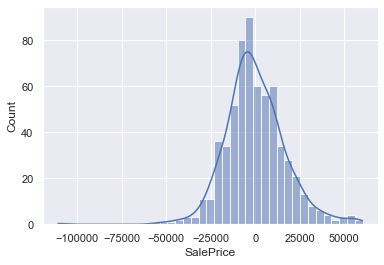

In [63]:
sns.histplot(residuos, kde=True)

#### Statsmodels

In [64]:
x = sm.add_constant(X)

model_initial = sm.OLS(y, x).fit()

C:\Users\lucas\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [66]:
model_initial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     186.0
Date:                Fri, 17 Dec 2021   Prob (F-statistic):          9.55e-271
Time:                        21:40:57   Log-Likelihood:                -6998.2
No. Observations:                 627   AIC:                         1.405e+04
Df Residuals:                     599   BIC:                         1.418e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -6.738e+05   1.11e+06     -0.609      0.543   -2.85e+06     1.5e+06
MSSubClass     -51.4718     30.540     -1.685      0.092    -111.450       8.506
LotFrontage    130.8700     66.571      1.966      0.050       0.129     261.610
LotArea          1.2111      0.361      3.359      0.001       0.503       1.919
OverallQual   1.059e+04   1006.409     10.520      0.000    8611.076    1.26e+04
OverallCond   5631.4120    876.893      6.422      0.000    3909.253    7353.571
YearBuilt      382.2675     68.163      5.608      0.000     248.400     516.135
YearRemodAdd   119.8640     59.345      2.020      0.044       3.315     236.413
MasVnrArea      -6.8022      7.783     -0.874      0.382     -22.087       8.483
BsmtFinSF1      20.1061      2.711      7.415      0.000      14.781      25.431
BsmtFinSF2    2.431e-11   6.93e-12      3.507      0.000    1.07e-11    3.79e-11
BsmtUnfSF        7.6420      2.417      3.162      0.002       2.896      12.388
TotalBsmtSF     27.7482      4.389      6.323      0.000      19.129      36.367
1stFlrSF         5.6151      4.383      1.281      0.201      -2.992      14.222
2ndFlrSF        29.9268      2.962     10.104      0.000      24.110      35.744
LowQualFinSF -5.895e-12   1.09e-12     -5.398      0.000   -8.04e-12   -3.75e-12
GrLivArea       35.5418      3.528     10.075      0.000      28.613      42.470
BsmtFullBath  4813.3346   2015.107      2.389      0.017     855.801    8770.869
BsmtHalfBath -3489.3507   3170.523     -1.101      0.272   -9716.044    2737.342
FullBath     -1360.8481   2390.795     -0.569      0.569   -6056.207    3334.511
HalfBath     -6742.8845   2296.838     -2.936      0.003   -1.13e+04   -2232.050
BedroomAbvGr -6572.6193   1447.417     -4.541      0.000   -9415.247   -3729.991
KitchenAbvGr -2.423e+04   4776.937     -5.072      0.000   -3.36e+04   -1.48e+04
TotRmsAbvGrd   931.0629   1108.158      0.840      0.401   -1245.285    3107.410
Fireplaces    3447.7145   1475.119      2.337      0.020     550.681    6344.748
GarageYrBlt    181.7569     68.595      2.650      0.008      47.040     316.474
GarageCars    1254.9377   2344.825      0.535      0.593   -3350.140    5860.015
GarageArea      20.5515      8.461      2.429      0.015       3.935      37.168
WoodDeckSF       9.9120      7.922      1.251      0.211      -5.646      25.470
OpenPorchSF     16.9387     18.519      0.915      0.361     -19.431      53.308
MoSold         331.8916    271.149      1.224      0.221    -200.627     864.411
YrSold        -351.9557    546.788     -0.644      0.520   -1425.811     721.899
==============================================================================
Omnibus:                       56.770   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              318.055
Skew:      